In [1]:
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
df = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])
df["target"] = dataset["target"]
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2]:
#respondemos las preguntas

#cuantas entradas hay?
print("Llegaron ", df.shape[0], " vinos")

#hay valores faltantes?
df.isna().sum()

#De que tipo son los datos
df.dtypes

#valores medios de cada columna
for col in df.columns:
    print("El valor medio de la columna ", col, " es ", df[col].mean())


Llegaron  178  vinos
El valor medio de la columna  alcohol  es  13.00061797752809
El valor medio de la columna  malic_acid  es  2.3363483146067416
El valor medio de la columna  ash  es  2.3665168539325845
El valor medio de la columna  alcalinity_of_ash  es  19.49494382022472
El valor medio de la columna  magnesium  es  99.74157303370787
El valor medio de la columna  total_phenols  es  2.295112359550562
El valor medio de la columna  flavanoids  es  2.0292696629213487
El valor medio de la columna  nonflavanoid_phenols  es  0.3618539325842696
El valor medio de la columna  proanthocyanins  es  1.5908988764044945
El valor medio de la columna  color_intensity  es  5.058089882022472
El valor medio de la columna  hue  es  0.9574494382022471
El valor medio de la columna  od280/od315_of_diluted_wines  es  2.6116853932584267
El valor medio de la columna  proline  es  746.8932584269663
El valor medio de la columna  target  es  0.9382022471910112


In [3]:
#cuantos vinos de cada clase hay?
df["target"].value_counts().sort_index()

,count
target,
0,59
1,71
2,48


In [4]:
#generamos la matriz de correlación

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='target')
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
from sklearn.tree import DecisionTreeClassifier
X = dataset["data"]
y = dataset["target"]
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

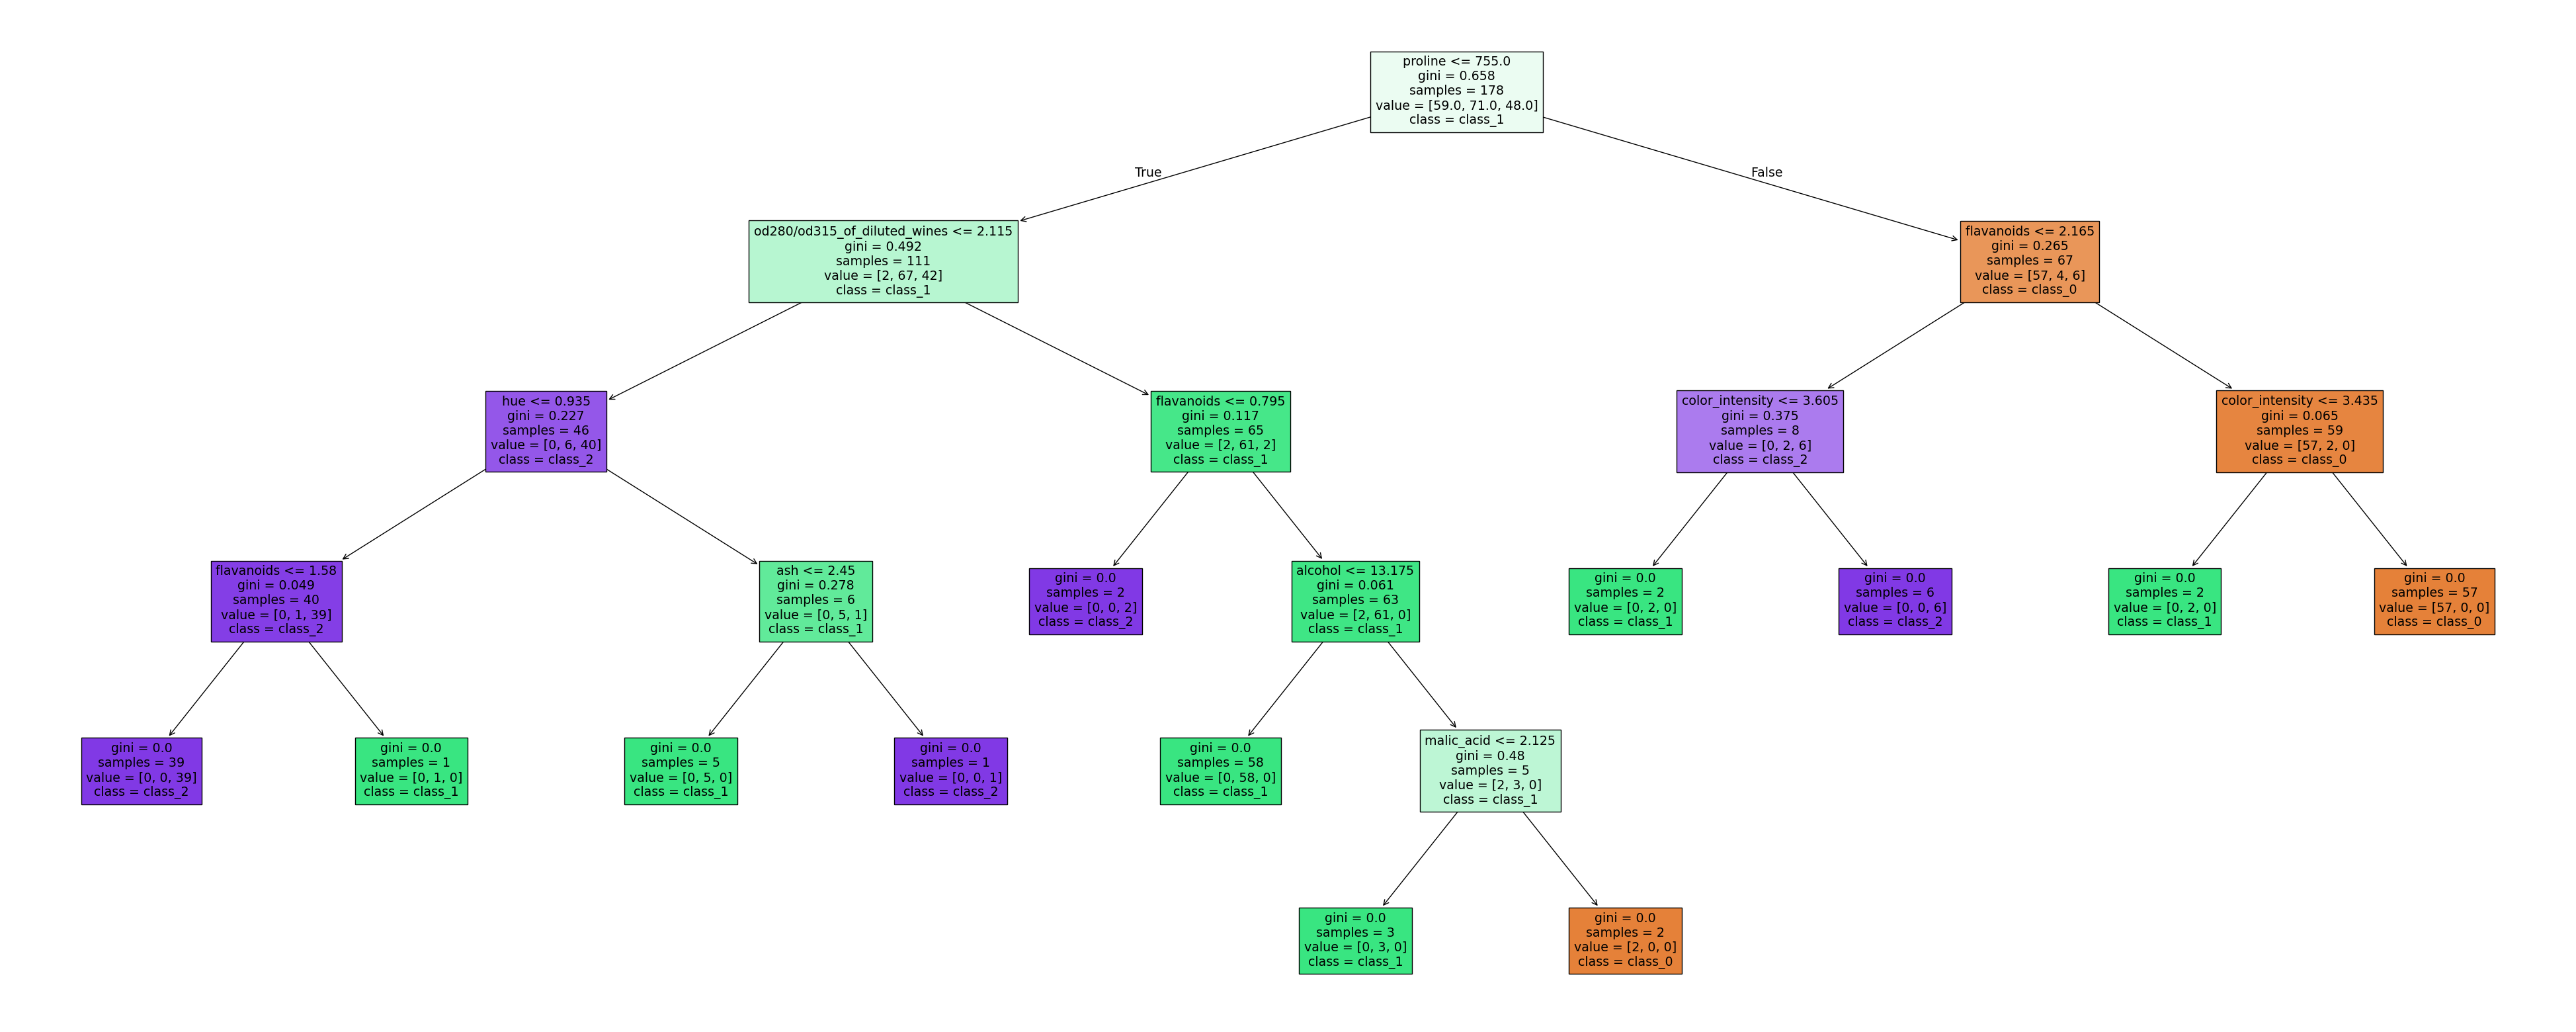

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=dataset["feature_names"],
class_names=dataset["target_names"], filled=True)
plt.show()

El objetivo de este arbol es llegar a la pureza 100%, gini=0. Cada color representa una clase. Hace lo que nosotrs hacíamos a mano, establece un umbral entonces debajo de ese umbral los pone de un lado y los otros del otro.

Vamos a hacer la división del dataset en un porcentaje para entrenar y uno para testear

In [7]:
y_pred=clf.predict(X)

from sklearn.metrics import accuracy_score
precision=accuracy_score(y, y_pred)
print("Predicciones: ", y_pred[:10])
print("La precisión del modelo es de ", precision)

#es pq estamos calculando la precision sobre el mismo modelo de datos

Predicciones:  [0 0 0 0 0 0 0 0 0 0]
La precisión del modelo es de  1.0


In [8]:
#para ello, vamos a dividir el conjunto en train y test

from sklearn.model_selection import train_test_split
#CON SHUFFLE=FALSE
X_train_shuffle_false, X_test_shuffle_false, y_train_shuffle_false, y_test_shuffle_false = train_test_split(X, y, test_size=0.2, shuffle=False)
clf.fit(X_train_shuffle_false, y_train_shuffle_false)

y_pred_shuffle_false=clf.predict(X_test_shuffle_false)
precision_shuffle_false=accuracy_score(y_test_shuffle_false, y_pred_shuffle_false)
print("Predicciones: ", y_pred_shuffle_false)
print("La precisión del modelo (shuffle=False) es de ", precision_shuffle_false)

#CON SHUFFLE=TRUE
X_train_shuffle_true, X_test_shuffle_true, y_train_shuffle_true, y_test_shuffle_true = train_test_split(X, y, test_size=0.2, shuffle=True)
clf.fit(X_train_shuffle_true, y_train_shuffle_true)

y_pred_shuffle_true=clf.predict(X_test_shuffle_true)
precision_shuffle_true=accuracy_score(y_test_shuffle_true, y_pred_shuffle_true)
print("Predicciones: ", y_pred_shuffle_true)
print("La precisión del modelo (shuffle=True) es de ", precision_shuffle_true)

#CON STRATIFY=Y
X_train_stratify_y, X_test_stratify_y, y_train_stratify_y, y_test_stratify_y = train_test_split(X, y, test_size=0.2, stratify=y)
clf.fit(X_train_stratify_y, y_train_stratify_y)

y_pred_stratify_y=clf.predict(X_test_stratify_y)
precision_stratify_y=accuracy_score(y_test_stratify_y, y_pred_stratify_y)
print("Predicciones: ", y_pred_stratify_y)
print("La precisión del modelo (stratify=y) es de ", precision_stratify_y)

#####

X_train_no_shuffle, X_test_no_shuffle, y_train_no_shuffle, y_test_no_shuffle = train_test_split(X, y, test_size=0.2)
clf.fit(X_train_no_shuffle, y_train_no_shuffle)

y_pred_no_shuffle=clf.predict(X_test_no_shuffle)
precision_no_shuffle=accuracy_score(y_test_no_shuffle, y_pred_no_shuffle)
print("Predicciones: ", y_pred_no_shuffle)
print("La precisión del modelo (sin shuffle) es de ", precision_no_shuffle)

####

X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5)
clf.fit(X_train_50, y_train_50)

y_pred_50=clf.predict(X_test_50)
precision_50=accuracy_score(y_test_50, y_pred_50)
print("Predicciones: ", y_pred_50)
print("La precisión del modelo (sin shuffle) y con 50% de los datos es", precision_50)

Predicciones:  [2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
La precisión del modelo (shuffle=False) es de  0.9444444444444444
Predicciones:  [0 0 0 0 1 2 1 0 0 0 2 2 1 0 1 2 1 0 2 1 1 0 1 2 1 2 2 0 2 1 1 1 1 0 0 1]
La precisión del modelo (shuffle=True) es de  0.9166666666666666
Predicciones:  [1 1 2 0 2 1 2 1 2 2 0 2 2 0 1 0 1 0 0 1 0 2 1 2 0 1 0 1 2 2 0 1 0 1 2 2]
La precisión del modelo (stratify=y) es de  0.9166666666666666
Predicciones:  [2 0 0 1 1 2 2 1 1 2 1 1 1 2 0 1 1 0 2 2 1 2 1 2 0 1 0 0 1 2 1 2 0 0 1 0]
La precisión del modelo (sin shuffle) es de  0.8333333333333334
Predicciones:  [2 0 1 2 1 1 1 1 2 0 2 1 2 0 0 2 1 0 1 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1 1 1 0
 0 1 0 2 0 0 0 0 0 0 1 1 2 1 2 1 2 2 2 1 2 2 1 1 0 2 1 1 1 1 1 1 2 0 0 2 2
 2 1 1 0 0 0 1 0 2 2 0 2 2 0 0]
La precisión del modelo (sin shuffle) y con 50% de los datos es 0.8876404494382022


Vemos que la precisión cambia según lo que hagamos respecto a shuffle y stratify. Esto es porque shuffle mezcla los datos antes de hacer la división, y puede afectar si están ordenados, como es el caso de este dataset. El tener más precisión no necesariamente significa que el modelo es mejor. Por otro lado, con stratify, vemos que la precisión es mejor que sin shuffle y sin stratify. Esto es porque sabemos que stratify equilibra las clases, por lo que idealmente, es mejor usar shuffle=True y stratify para mejorar las predicciones, pues así nuestro modelo no está sesgado. En este caso particular vemos que solo shuffle altera la precisión, y esto se debe a que las clases están equilibradas. Cuando no lo están es cuando necesitamos usar stratify

Ahora, contamos y calculamos el porcentaje de cada caso

In [12]:
print("SHUFFLE=FALSE")
print("Tamaño y porcentaje de X_test,train", X_test_shuffle_false.shape, X_train_shuffle_false.shape, len(X_train_shuffle_false)/len(X) * 100,"%", len(X_test_shuffle_false)/len(X) * 100,"%")
print("Tamaño y porcentaje de y_test,train", y_test_shuffle_false.shape, y_train_shuffle_false.shape, len(y_train_shuffle_false)/len(y) * 100,"%", len(y_test_shuffle_false)/len(y) * 100,"%")

print("SHUFFLE=TRUE")
print("Tamaño y porcentaje de X_test,train", X_test_shuffle_true.shape, X_train_shuffle_true.shape, len(X_train_shuffle_true)/len(X) * 100,"%", len(X_test_shuffle_true)/len(X) * 100,"%")
print("Tamaño y porcentaje de y_test,train", y_test_shuffle_true.shape, y_train_shuffle_true.shape, len(y_train_shuffle_true)/len(y) * 100,"%", len(y_test_shuffle_true)/len(y) * 100,"%")

print("STRATIFY=Y")
print("Tamaño y porcentaje de X_test,train", X_test_stratify_y.shape, X_train_stratify_y.shape, len(X_train_stratify_y)/len(X) * 100,"%", len(X_test_stratify_y)/len(X) * 100,"%")
print("Tamaño y porcentaje de y_test,train", y_test_stratify_y.shape, y_train_stratify_y.shape, len(y_train_stratify_y)/len(y) * 100,"%", len(y_test_stratify_y)/len(y) * 100,"%")

SHUFFLE=FALSE
Tamaño y porcentaje de X_test,train (36, 13) (142, 13) 79.7752808988764 % 20.224719101123593 %
Tamaño y porcentaje de y_test,train (36,) (142,) 79.7752808988764 % 20.224719101123593 %
SHUFFLE=TRUE
Tamaño y porcentaje de X_test,train (36, 13) (142, 13) 79.7752808988764 % 20.224719101123593 %
Tamaño y porcentaje de y_test,train (36,) (142,) 79.7752808988764 % 20.224719101123593 %
STRATIFY=Y
Tamaño y porcentaje de X_test,train (36, 13) (142, 13) 79.7752808988764 % 20.224719101123593 %
Tamaño y porcentaje de y_test,train (36,) (142,) 79.7752808988764 % 20.224719101123593 %


Ahora elegiremos los parámetros a variar. Como no tenemos un dataset muy grande ni complejo, podemos experimentar con varios parámetros que limiten un poco el crecimiento del árbol, pues los valores default dan pie a que el árbol crezca lo más posible. Por lo que eligiré los siguientes parámtros  con pocos valores para ver si el rendimiento del árbol mejora, es decir, su precisión. La elección de los parámetros fue pensada un poco arbitrariamente, pero considerando los parámtros que comprendí mejor y que creo afectarían el tamaño del árbol. En particular me gustaría ver que pasa si cambiamos de criterio.

In [13]:
#creamos el diccionario con los parametros a variar

from sklearn.model_selection import ParameterGrid
parametros = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_leaf_nodes": [None, 3, 6, 9],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "min_impurity_decrease": [0.0, 0.01, 0.05]
}
for configuracion in ParameterGrid(parametros):
    print(configuracion) #todas las configuraciones posibles

{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 5}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 10}
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'cr

Con ello, busquemos el mejor árbol de decisión

In [14]:
arboles=[]
for configuracion in ParameterGrid(parametros):
    clf = DecisionTreeClassifier(**configuracion)
    clf.fit(X_train_shuffle_true, y_train_shuffle_true) #ya no es necesario volver a dividir, tomamos lo que consideramos mejor previamente
    y_pred=clf.predict(X_test_shuffle_true)
    precision=accuracy_score(y_test_shuffle_true, y_pred)
    arboles.append((configuracion, precision)) #se guardarán en parejas de la configuración y su precision

#y buscamos el mejor arbol
max_precision=0
mejor_arbol=None
for arbol in arboles:
    if arbol[1]>max_precision:
        max_precision=arbol[1]
        mejor_arbol=arbol[0]
    else:
        continue
print("El mejor arbol tiene la configuración", mejor_arbol, " con una precisión de ", max_precision)

El mejor arbol tiene la configuración {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5}  con una precisión de  1.0


Una precisión del 100% se me hace algo sospechosa, pero como eligió el criterio entropy, supongo que tiene que ver con ello. La fórmula es ligeramente distinta, según lo que leí. Parece ser que los parámetros defaul, excepto min_samples_split son los que mejoran el árbol

In [15]:
from sklearn.model_selection import KFold
import numpy as np
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2)
kf = KFold(5)

precisiones=[] #aquí guardaremos parejas (precision, tamaño del fold)
for indices_t, indices_v in kf.split(X_train_valid):
    X_train = X_train_valid[indices_t]
    X_valid = X_train_valid[indices_v]
    y_train = y_train_valid[indices_t]
    y_valid = y_train_valid[indices_v]

    #para cada división, usamos la configuración del ejercicio pasado
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=5)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_valid)
    precision=accuracy_score(y_valid, y_pred)
    precisiones.append((precision, len(indices_v)))

#y sacamos la precisión promedio ponderada
print("Precisión promedio: ", np.average([precisiones[i][0] for i in range(len(precisiones))], weights=[precisiones[i][1] for i in range(len(precisiones))]))

Precisión promedio:  0.9295774647887324


Me dio algo distinto. No es inaceptable, y de hecho está bastante bien, mejor que la primerz aproximación que hicimos, de 0.916. Sin embargo, creo que es más confiable la validación cruzada, pues esa precisión del 100% en el primer conjunto de prueba pudo haber sido una coincidencia o un overfitting. No obstante, la configuración elegida aún así es bastante buena, personalmente la conservaría por su precisión. Considerando que el set es de vinos y no de vidas humanas, por ejemplo, una precisión del 92% me parece suficiente.